In [1]:
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
# Load the data from the pickle file
with open("output_pickle.pkl", 'rb') as file:
    output_pickle = pickle.load(file)

In [3]:
(output_pickle[0][0])

{(0.0, 1.0, 90): 209.21887728472933,
 (0.0, 1.0, 30): 251.3770417828313,
 (0.0, 1.0, 150): 234.50447909265068,
 (0.0, 1.0, 60): 214.2086248526577,
 (0.0, 1.0, 180): 219.08369327645497,
 (0.0, 1.0, 120): 219.62594878584957,
 (0.05, 0.95, 120): 120.33179477561936,
 (0.05, 0.95, 150): 95.40381662759323,
 (0.05, 0.95, 180): 93.62855324606944,
 (0.05, 0.95, 60): 162.79767159428496,
 (0.05, 0.95, 90): 141.59121372243797,
 (0.05, 0.95, 30): 151.99729748904846,
 (0.1, 0.9, 120): 99.29569868932718,
 (0.1, 0.9, 90): 107.4012180062785,
 (0.1, 0.9, 60): 120.27569795615126,
 (0.1, 0.9, 30): 96.37159944665657,
 (0.1, 0.9, 150): 89.80755686448536,
 (0.1, 0.9, 180): 75.36454480258678,
 (0.15000000000000002, 0.85, 120): 82.11196399813828,
 (0.15000000000000002, 0.85, 60): 92.99387191527455,
 (0.15000000000000002, 0.85, 90): 94.49930841223906,
 (0.15000000000000002, 0.85, 30): 65.17912942992363,
 (0.15000000000000002, 0.85, 180): 78.0047915384542,
 (0.15000000000000002, 0.85, 150): 80.7658184990909,
 (0

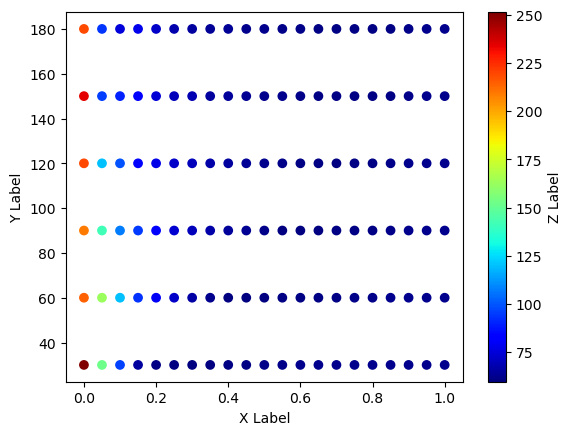

In [4]:
delta_t = 30
xs, ys, zs = [], [], []
delta_ts = []
for key, val in output_pickle[0][0].items():
    #if key[2] == delta_t:
    xs.append(key[0])
    ys.append(key[1])
    delta_ts.append(key[2])
    zs.append(val)
# Assuming you've already collected data in xs, ys, and zs lists
"""
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs, ys, zs)
ax.scatter(xs, delta_ts, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#plt.plot(xs,zs)

plt.show()
"""
fig = plt.figure()
ax = fig.add_subplot(111)

# Scatter plot with color based on zs values
scatter = ax.scatter(xs, delta_ts, c=zs, cmap='jet')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

# Add a colorbar to show the mapping of color values
cbar = fig.colorbar(scatter, ax=ax, label='Z Label')

plt.show()

In [5]:
from pyomo.environ import *

# Define a function to create the Pyomo model
def create_model(input_value):
    # Create a Concrete Model
    model = ConcreteModel()

    # Define the independent variable
    model.x = Var(initialize=input_value)

    # Define the piecewise function
    model.piecewise_function = Piecewise(model.y, model.x,
                                          pw_pts=[0, 1, 2, 3],
                                          pw_constr_type='EQ',
                                          f_rule=[0, 1, 4, 9])

    #L.con = Piecewise(model.y, model.x, pw_pts=input_values, pw_constr_type='EQ', f_rule=output_values, pw_repn='INC', warn_domain_coverage= False)
    return model

# Function to evaluate the piecewise function at a given input value
def evaluate_piecewise_function(input_value):
    # Create the Pyomo model
    model = create_model(input_value)

    # Solve the model
    solver = SolverFactory('glpk')
    solver.solve(model)

    # Return the value of the piecewise function at the solution
    return model.piecewise_function.expr()

# Test the function with an input value
input_value = 2.5
output_value = evaluate_piecewise_function(input_value)
print("Input:", input_value)
print("Output of the piecewise function:", output_value)

AttributeError: 'ConcreteModel' object has no attribute 'y'